In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Denerate a Data Sample

We use scikit-learn library to generate data sample.<br/>
The sample contains maxtrix with objects $X$ and vector of the object labels $y$.
<table><tr>
<td> <img src="img/known_all_object.png" width="250"> </td>
<td> <img src="img/known_all_feature.png" width="250"> </td>
</tr></table>

In [2]:
from sklearn.datasets import make_moons, load_iris # import function from the library

N = 1000

X, y = make_moons(n_samples=N, noise=0.2, random_state=11) # generate data sample

Lets look at the first 10 objects in $X$

In [3]:
X[:10, :]

array([[ 0.97659285,  0.63327228],
       [-0.8516316 ,  0.51169095],
       [-0.79913418,  0.51528747],
       [ 0.8738094 , -0.45662141],
       [ 0.8564317 , -0.39553011],
       [-0.38782948,  0.99133597],
       [-0.24469046, -0.12270667],
       [ 1.22129182, -0.44679249],
       [ 0.41785334, -0.0388701 ],
       [ 0.21415835, -0.25915001]])

And look at the first 10 objects in $y$

In [4]:
y[:10]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

# Plot the Sample

Plot the sample using matplotlib library. <br/>
Plots give better understanding of the sample and help to find better solution of a problem.

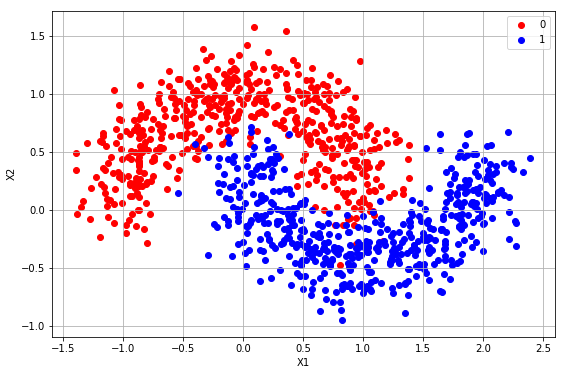

In [5]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X[y == 0, 0],     # selects all objects with y == 0 and the 1st column of X
            X[y == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='r',        # points color
            label='0')        # label for the plot legend


# Plot all objects with y == 1 (class 1)
plt.scatter(X[y == 1, 0],     # selects all objects with y == 1 and the 1st column of X
            X[y == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
            color='b',        # points color
            label='1')        # label for the plot legend

plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

# Classification

The problem is to train a **KNN** classifier to separate two classes (0 and 1) in the sample.

## Data Split

We split data into **train** and **test** samples. Train sample is used to train the KNN classifier. Test sample is used to measure quality of the classifier. 

<img src="img/train_test_object.png" width="250">

To do this we use `train_test_split` function from the scikit-learn library.

In [6]:
# import train_test_split function to split the sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5,    # 20% for test, 80% for train
                                                    random_state=123) # shuffle objects before split

Lets print out shape of the samples

In [7]:
print("X, y shapes: ", X.shape, y.shape)
print("X_train, y_train shapes: ", X_train.shape, y_train.shape)
print("X_test, y_test shapes: ", X_test.shape, y_test.shape)

X, y shapes:  (1000, 2) (1000,)
X_train, y_train shapes:  (500, 2) (500,)
X_test, y_test shapes:  (500, 2) (500,)


Questions for students:
* Why sample split is needed?
* What else split methods do you know?
* What is KFold? How does it work?

## KNN Classifier

Classification algorithm:

* Find ***k*** closest objects to the predicted object ***x*** in the train semple.
* Associate ***x*** the most frequent class among its ***k*** neighbours.

<img src="img/knn1.webp" width="400">

Let's realize your first classifier on python!

In [8]:
class KNNClassifier(object):
    
    def __init__(self, k_neighbors=1):
        """
        This is a constructor of the class. 
        Here you can define parameters (k_neighbors) of the class and 
        attributes, that are visible within all methods of the class.
        
        Parameters
        ----------
        k_neighbors : int
            Number of neighbors used for classification.
        """
        
        # Make this parameter visible in all methods of the class
        self.k_neighbors = k_neighbors
        
        # Lets define variables for data, that will be used during the classifier fit and predict
        self.X_train = None
        self.y_train = None
                
    
    def fit(self, X, y):
        """
        This method trains the KNN classifier. 
        Actualy, the KNN classifier has no training procedure.
        It just remembers data (X, y) that will be used for predictions.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        y : numpy.array, shape = (n_objects)
            1D array with the object labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Just save X and y. There is no training procedure for KNN classifier
        self.X_train = X
        self.y_train = y
        
    
    def calculate_distances(self, X, one_x):
        """
        This method calculates distances between one object and all other objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
        one_x : numpy.array, shape = (n_features)
        """
        
        dists = np.sqrt( np.sum( (X - one_x)**2, axis=1 ) )
        return dists
    
    
    def predict(self, X):
        """
        This methods performs labels prediction for new objects.
        
        Parameters
        ----------
        X : numpy.array, shape = (n_objects, n_features)
            Matrix of objects that are described by their input features.
            
        Returns
        -------
        y_predicted : numpy.array, shape = (n_objects)
            1D array with predicted labels. 
            For the classification labels are integers in {0, 1, 2, ...}.
        """
        
        # Create an empty list for predicted labels
        y_predicted = []
        
        # For each object in X make prediction
        for one_x in X:
            
            # one_x = [0.2, 0.57] (example)
            
            # Calculate distances between an object and all objects from train smaple
            distances = self.calculate_distances(self.X_train, one_x)
            # distances = [0.25, 0.10, 0.32, 0.05] (example)
            
            # Sort the distances and get indeces of the sorted order
            sorted_indeces = distances.argsort()
            # sorted_indeces = [3, 1, 0, 2] (example)
            
            # Get k_neighbors from train sample with the smallest distances
            k_neighbors_indeces = sorted_indeces[:self.k_neighbors] # take the first k_neighbors elements
            # k_neighbors_indeces = [3, 1, 0], for k_neighbors=2 (example)
            
            # Get labels of these k_neighbors
            k_neighbors_labels = self.y_train[k_neighbors_indeces]
            # k_neighbors_labels = [0, 1, 0] (example)
            
            # Get list of unique labels and counts of each label
            unique_labels, label_counts = np.unique(k_neighbors_labels, return_counts=True)
            # unique_labels = [0, 1] (example)
            # label_counts  = [2, 1] (example)
            
            # Get label with the maximum count
            label_max_count = unique_labels[label_counts == label_counts.max()][0]
            # label_max_count = 0 (example)
            
            # Save the predicted label
            y_predicted.append(label_max_count)
            
        return np.array(y_predicted) # return numpy.array

## Run KNN Classifier

In [9]:
# Create a KNN classifier object
knn = KNNClassifier(k_neighbors=2)

# Train the classifier (remember, that KNN has no training procedure, but it is a tradition :)
knn.fit(X_train, y_train)

# Use the classifier to predict labels
y_test_predict = knn.predict(X_test)

In [10]:
# Let's print out the first 20 predicted labels
y_test_predict[:20]

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [11]:
# Let's print out the first 20 true test labels
y_test[:20]

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

## Plot Decision Boundary

Let's plot the classifier's decision boundary. 

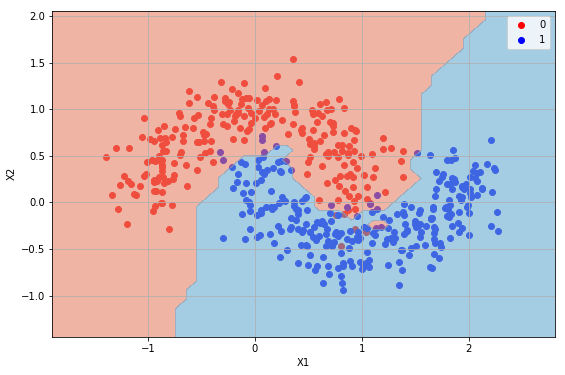

In [12]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Plot all objects with y == 0 (class 0)
plt.scatter(X_test[y_test == 0, 0],     # selects all objects with y == 0 and the 1st column of X
            X_test[y_test == 0, 1],     # selects all objects with y == 0 and the 2nd column of X
            color='r',                  # points color
            label='0')                  # label for the plot legend


# Plot all objects with y == 1 (class 1)
plt.scatter(X_test[y_test == 1, 0],     # selects all objects with y == 1 and the 1st column of X
            X_test[y_test == 1, 1],     # selects all objects with y == 1 and the 2nd column of X
            color='b',                  # points color
            label='1')                  # label for the plot legend


### THIS IS JUST MAGIC :)

# plot decision boundary
h=0.1
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.6, levels=1)

### THE END OF THE MAGIC


plt.xlabel('X1') # set up X-axis label
plt.ylabel('X2') # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

## Measure Quality of the Classification

Let's measure the quality using **accuracy score**:

$$
\text{Accuracy }(y\_true, y\_predict) = \frac{1}{N} \sum_{i=1}^{N} I(y\_predict_{i} == y\_true_{i})
$$

For the accuracy calculation we use function **accuracy_score** from the scukit-learn library.

In [13]:
# Import accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate accuracy for the test sample
accuracy_test = accuracy_score(y_test, y_test_predict)

print("Test accuracy of KNN classifier: ", accuracy_test)

Test accuracy of KNN classifier:  0.954


Let's consider how the classifier quality depends on **k_neighbors** value of the classifier. <br/> 
For that, for each **k_neighbors** value from a range we train the KNN classifier and make predictions for the train and test samples. <br/>
Then, we calculate quality metrics for the samples.

In [14]:
ks = np.arange(1, 50, 1) # create list of k_neighbors values

# Lists for quality metrics
scores_test = []
scores_train = []

# For each k_neighbors value ...
for k in ks:
    
    # Create a KNN classifier object
    knn = KNNClassifier(k_neighbors=k)
    
    # Train the classifier (remember, that KNN has no training procedure, but it is a tradition :)
    knn.fit(X_train, y_train)

    # Use the classifier to predict labels
    y_test_predict = knn.predict(X_test)    # predict for the test smaple
    y_train_predict = knn.predict(X_train)  # predict for the train smaple
    
    # Calculate accuracy for the test and train samples
    accuracy_test = accuracy_score(y_test, y_test_predict)    # for the test smaple
    accuracy_train = accuracy_score(y_train, y_train_predict) # for the train smaple 
    
    # Collect scores
    scores_test.append(accuracy_test)
    scores_train.append(accuracy_train)

Now, let's make a plot of a dependency of the classification **accuracy** from **k_neighbors** value for the train and test samples.

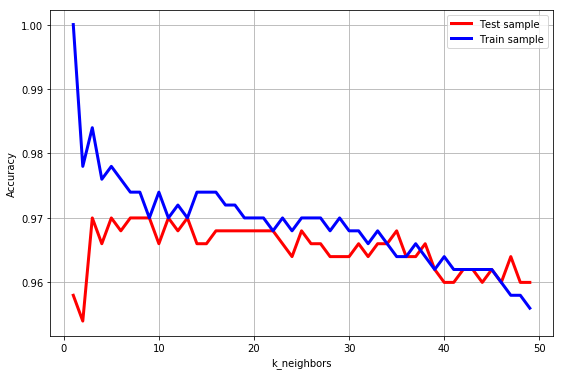

In [15]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Create the plots
plt.plot(ks, scores_test, color='r', linewidth=3, label='Test sample')
plt.plot(ks, scores_train, color='b', linewidth=3, label='Train sample')

plt.xlabel('k_neighbors') # set up X-axis label
plt.ylabel('Accuracy')    # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

Questions for studets
* What is the best k_neighbors value?
* How can you explain this behaviour?

### Experiments:
* Change noise level in the sample
* Change number of objects in the sample
* How decision boundary cahnges with k_neighbors?

# Feature Scales Dependency

Previously, object features have the same scales (in range [-1.5, 1.5]). <br/>
Consider, how it KNN classification quality changes with increasing scale of one of the input features.

In [16]:
M = np.arange(1, 200, 5) # create list of multipliers values

# Lists for quality metrics
scores_test = []

# For each multiplier value ...
for mult in M:
    
    # Make samples copy
    X_train2 = X_train.copy()
    X_test2 = X_test.copy()

    # Multiply feature_2 by the multiplier mult
    X_train2[:, 1] *= mult
    X_test2[:, 1] *= mult
    
    # Create a KNN classifier object
    knn = KNNClassifier(k_neighbors=5)
    
    # Train the classifier (remember, that KNN has no training procedure, but it is a tradition :)
    knn.fit(X_train2, y_train)

    # Use the classifier to predict labels
    y_test_predict = knn.predict(X_test2)    # predict for the test smaple
    
    # Calculate accuracy for the test and train samples
    accuracy_test = accuracy_score(y_test, y_test_predict)    # for the test smaple
    
    # Collect scores
    scores_test.append(accuracy_test)

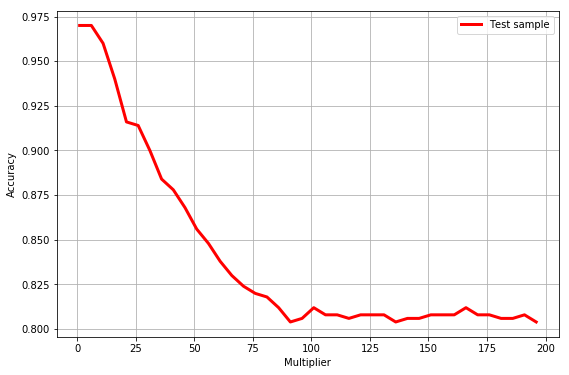

In [17]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Create the plots
plt.plot(M, scores_test, color='r', linewidth=3, label='Test sample')

plt.xlabel('Multiplier')  # set up X-axis label
plt.ylabel('Accuracy')    # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

Question to students:
* How can you explain this?

# Weak Features Influence

If a data sample contains weak of usless for classification features, it is better to remove them from the sample. <br/>
Let's add several random features to the sample and look how KNN classification quality changes.

In [18]:
Ns = np.arange(1, 100, 5) # create list of multipliers values

# Lists for quality metrics
scores_test = []

# For each multiplier value ...
for n in Ns:
        
    X_train2 = np.c_[X_train, 
                     np.random.rand(X_train.shape[0], n)] # add n random columns
    X_test2 = np.c_[X_test, 
                    np.random.rand(X_test.shape[0], n)] # add n random columns
    
    # Create a KNN classifier object
    knn = KNNClassifier(k_neighbors=5)
    
    # Train the classifier (remember, that KNN has no training procedure, but it is a tradition :)
    knn.fit(X_train2, y_train)

    # Use the classifier to predict labels
    y_test_predict = knn.predict(X_test2)    # predict for the test smaple
    
    # Calculate accuracy for the test and train samples
    accuracy_test = accuracy_score(y_test, y_test_predict)    # for the test smaple
    
    # Collect scores
    scores_test.append(accuracy_test)

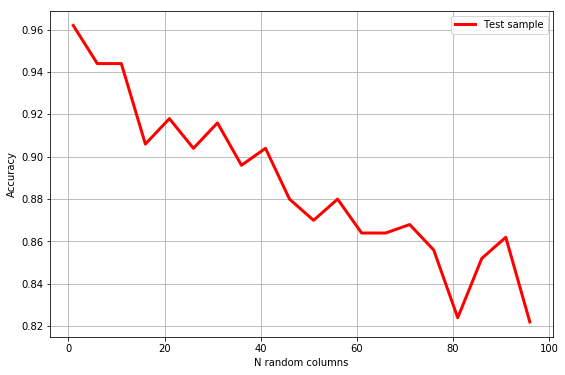

In [19]:
# Create an figure with a custom size
plt.figure(figsize=(9, 6))

# Create the plots
plt.plot(Ns, scores_test, color='r', linewidth=3, label='Test sample')

plt.xlabel('N random columns')  # set up X-axis label
plt.ylabel('Accuracy')    # set up Y-axis label

plt.legend(loc='best') # create the plot legend and set up it position
plt.grid(b=1) # create grid on the plot

plt.show() # display the plot

Questions to students:
* How can you explain this?